In [1]:
from modules.helpers import load_data
from alive_progress import alive_it
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Learning

In [2]:
(train_x, train_y), (test_x, test_y) = load_data('linear-reg')

In [3]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(train_x, train_y)

# Use the model for prediction
predictions = model.predict(test_x)

# Choosing the Threshold

In [4]:
steps = 1000
ths = []
precs = []
recs = []
accs = []

for i in alive_it(range(1, steps + 1), force_tty=True, max_cols=120):
    th = i / steps
    cut_pred = (predictions >= th)
    ths.append(th)
    accs.append(accuracy_score(cut_pred, test_y))
    precs.append(precision_score(cut_pred, test_y))
    recs.append(recall_score(cut_pred, test_y))

|████████████████████████████████████████| 1000/1000 [100%] in 9.0s (110.74/s)                                          


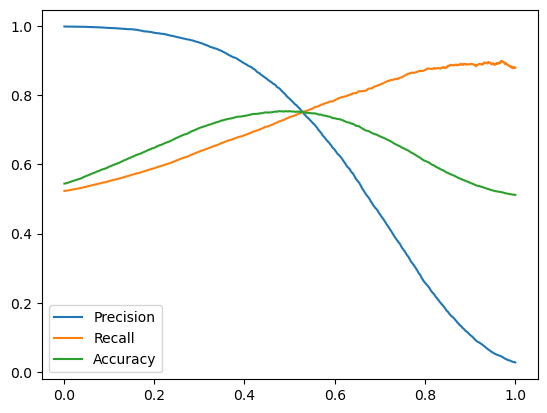

In [5]:
plt.plot(ths, precs, label='Precision')
plt.plot(ths, recs, label='Recall')
plt.plot(ths, accs, label='Accuracy')
plt.legend()
plt.show()

In [6]:
for i in range(len(ths)):
    if accs[i] > 0.7535:
        print(f'- Threshold: {ths[i]:.3f} | Accuracy: {accs[i]:.3f} | Precision: {precs[i]:.3f} | Recall: {recs[i]:.3f}')

- Threshold: 0.475 | Accuracy: 0.754 | Precision: 0.822 | Recall: 0.723
- Threshold: 0.476 | Accuracy: 0.754 | Precision: 0.821 | Recall: 0.724
- Threshold: 0.477 | Accuracy: 0.754 | Precision: 0.820 | Recall: 0.724
- Threshold: 0.478 | Accuracy: 0.754 | Precision: 0.819 | Recall: 0.725
- Threshold: 0.479 | Accuracy: 0.754 | Precision: 0.818 | Recall: 0.725
- Threshold: 0.482 | Accuracy: 0.754 | Precision: 0.813 | Recall: 0.727
- Threshold: 0.490 | Accuracy: 0.754 | Precision: 0.803 | Recall: 0.731
- Threshold: 0.491 | Accuracy: 0.754 | Precision: 0.802 | Recall: 0.732
- Threshold: 0.492 | Accuracy: 0.754 | Precision: 0.800 | Recall: 0.733
- Threshold: 0.494 | Accuracy: 0.754 | Precision: 0.797 | Recall: 0.733
- Threshold: 0.498 | Accuracy: 0.754 | Precision: 0.792 | Recall: 0.736
- Threshold: 0.499 | Accuracy: 0.754 | Precision: 0.791 | Recall: 0.736
- Threshold: 0.500 | Accuracy: 0.754 | Precision: 0.790 | Recall: 0.737
- Threshold: 0.501 | Accuracy: 0.754 | Precision: 0.788 | Recall

In [7]:
th = 0.500

We choose this threshold as it has the maximum accuracy and recall while maintaining a high precision.

# Model Evaluation

In [8]:
cut_pred = (predictions >= th)

In [9]:
print(f'Accuracy:  {accuracy_score(test_y, cut_pred):.4f}')
print(f'Precision: {precision_score(test_y, cut_pred):.4f}')
print(f'Recall:    {recall_score(test_y, cut_pred):.4f}')
print(f'F1 Score:  {f1_score(test_y, cut_pred):.4f}')
print(f'AUC ROC:   {roc_auc_score(test_y, cut_pred):.4f}')

Accuracy:  0.7536
Precision: 0.7366
Recall:    0.7895
F1 Score:  0.7622
AUC ROC:   0.7536


In [10]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(test_y, cut_pred)
    )
disp.plot()
plt.title('M1 - Linear Regression')
plt.tight_layout()
plt.savefig('Output/CM - M1.png', bbox_inches='tight')
plt.close()